<a href="https://www.kaggle.com/code/feliperafael/data-exploratory-analysis?scriptVersionId=240931011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-environment-communities/Dataset_de_200_Comunidades_para_Analise_Ambiental.csv


## Exploratory Analysis

In [2]:
df = pd.read_csv('/kaggle/input/dataset-environment-communities/Dataset_de_200_Comunidades_para_Analise_Ambiental.csv', sep = ',')
df.head()

,Comunidade,Município,Estado,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Frequência de Queimadas (ano),Distância de Área Urbana (km),Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
0,Comunidade 1,SÃO DOMINGOS DO CAPIM,Pará,25.6,86.5,22.9,2863.0,123.2,0,74.7,Sim,Não
1,Comunidade 2,SALINÓPOLIS,Pará,12.9,99.3,21.8,799.0,120.3,11,87.3,Sim,Não
2,Comunidade 3,TRACUATEUA,Pará,81.3,58.9,64.5,1924.0,104.8,5,43.9,Não,Sim
3,Comunidade 4,SÃO MIGUEL DO GUAMÁ,Pará,81.5,56.0,25.5,1715.0,42.3,0,5.3,Sim,Sim
4,Comunidade 5,MAGALHÃES BARATA,Pará,58.8,84.3,39.4,1990.0,89.4,9,17.0,Sim,Sim


In [3]:
df.shape

(200, 12)

In [4]:
df_null_cells = df.isnull().sum()
df_null_cells

Comunidade                                0
Município                                 0
Estado                                    0
Índice de Desmatamento (%)                0
Acesso à Água Potável (%)                 0
Cobertura Vegetal (%)                     0
Renda Média Mensal (R$)                   0
Densidade Populacional (hab/km²)          0
Frequência de Queimadas (ano)             0
Distância de Área Urbana (km)             0
Presença de Escola (Sim/Não)              0
Presença de Unidade de Saúde (Sim/Não)    0
dtype: int64

In [5]:
verify_unique_values = df.nunique()
verify_unique_values

Comunidade                                200
Município                                 101
Estado                                      1
Índice de Desmatamento (%)                175
Acesso à Água Potável (%)                 170
Cobertura Vegetal (%)                     182
Renda Média Mensal (R$)                   191
Densidade Populacional (hab/km²)          189
Frequência de Queimadas (ano)              12
Distância de Área Urbana (km)             187
Presença de Escola (Sim/Não)                2
Presença de Unidade de Saúde (Sim/Não)      2
dtype: int64

### Data Types

In [6]:
df_types_values = df.dtypes
df_types_values

Comunidade                                 object
Município                                  object
Estado                                     object
Índice de Desmatamento (%)                float64
Acesso à Água Potável (%)                 float64
Cobertura Vegetal (%)                     float64
Renda Média Mensal (R$)                   float64
Densidade Populacional (hab/km²)          float64
Frequência de Queimadas (ano)               int64
Distância de Área Urbana (km)             float64
Presença de Escola (Sim/Não)               object
Presença de Unidade de Saúde (Sim/Não)     object
dtype: object

In [7]:
df_objetct_features = df.select_dtypes(include='object')
df_objetct_features

,Comunidade,Município,Estado,Presença de Escola (Sim/Não),Presença de Unidade de Saúde (Sim/Não)
0,Comunidade 1,SÃO DOMINGOS DO CAPIM,Pará,Sim,Não
1,Comunidade 2,SALINÓPOLIS,Pará,Sim,Não
2,Comunidade 3,TRACUATEUA,Pará,Não,Sim
3,Comunidade 4,SÃO MIGUEL DO GUAMÁ,Pará,Sim,Sim
4,Comunidade 5,MAGALHÃES BARATA,Pará,Sim,Sim
...,...,...,...,...,...
195,Comunidade 196,MOJUÍ DOS CAMPOS,Pará,Sim,Sim
196,Comunidade 197,PORTO DE MOZ,Pará,Não,Sim
197,Comunidade 198,TUCURUÍ,Pará,Sim,Sim
198,Comunidade 199,CURUÇÁ,Pará,Sim,Sim


In [8]:
numeric_floats_features = df.select_dtypes(include='float')
numeric_floats_features

,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Distância de Área Urbana (km)
0,25.6,86.5,22.9,2863.0,123.2,74.7
1,12.9,99.3,21.8,799.0,120.3,87.3
2,81.3,58.9,64.5,1924.0,104.8,43.9
3,81.5,56.0,25.5,1715.0,42.3,5.3
4,58.8,84.3,39.4,1990.0,89.4,17.0
...,...,...,...,...,...,...
195,67.5,74.3,25.4,2293.0,17.2,20.5
196,73.3,46.8,87.2,1688.0,140.7,48.4
197,29.0,35.3,59.6,2190.0,103.8,20.3
198,20.1,39.0,44.1,1531.0,12.0,17.5


In [9]:
numeric_floats_features.describe()

,Índice de Desmatamento (%),Acesso à Água Potável (%),Cobertura Vegetal (%),Renda Média Mensal (R$),Densidade Populacional (hab/km²),Distância de Área Urbana (km)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,47.588000,67.678000,49.45950,1614.530000,82.469500,50.146500
std,25.011311,21.344876,23.47915,746.032763,44.554248,26.716665
min,5.400000,30.800000,11.70000,412.000000,2.900000,1.900000
25%,26.000000,51.400000,27.72500,944.750000,41.100000,28.400000
50%,51.050000,68.700000,47.65000,1576.000000,89.750000,51.800000
75%,67.550000,86.925000,69.40000,2195.250000,123.125000,68.950000
max,89.200000,100.000000,94.10000,2992.000000,149.700000,99.300000


In [10]:
numeric_int_features = df.select_dtypes(include='int')
numeric_int_features

,Frequência de Queimadas (ano)
0,0
1,11
2,5
3,0
4,9
...,...
195,2
196,9
197,2
198,6


In [11]:
numeric_int_features.describe()

,Frequência de Queimadas (ano)
count,200.000000
mean,5.670000
std,3.653469
min,0.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,11.000000


### Identifying outliers

In [12]:
numeric_floats_features.columns

Index(['Índice de Desmatamento (%)', 'Acesso à Água Potável (%)',
       'Cobertura Vegetal (%)', 'Renda Média Mensal (R$)',
       'Densidade Populacional (hab/km²)', 'Distância de Área Urbana (km)'],
      dtype='object')

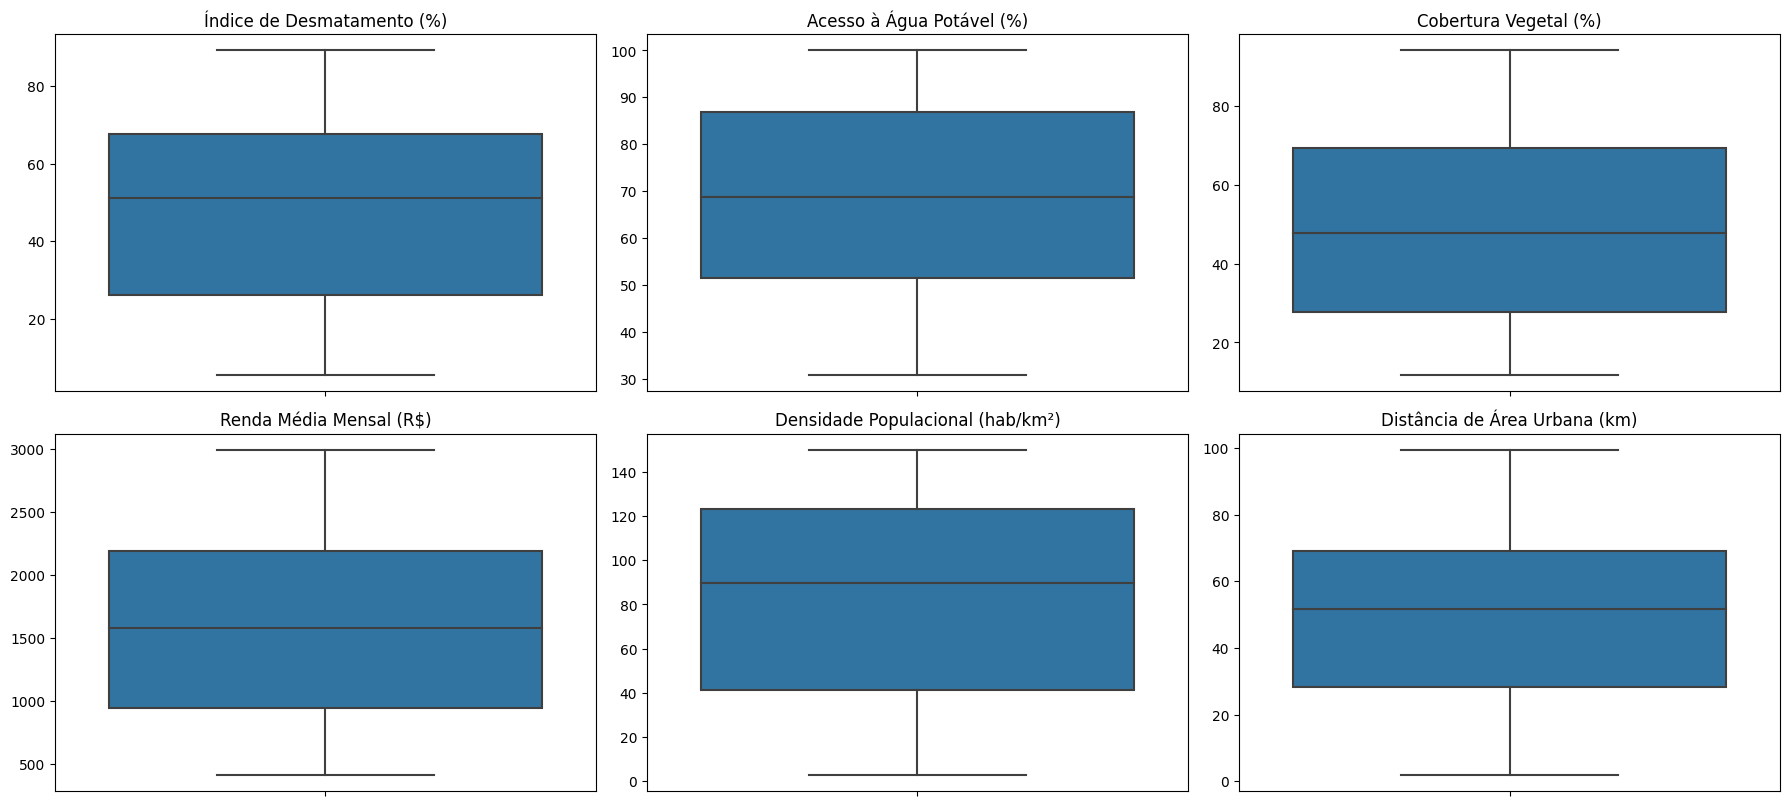

In [13]:
num_colunas = len(numeric_floats_features)

num_cols_grid = 3 
num_rows_grid = math.ceil(num_colunas / num_cols_grid)

fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 6, num_rows_grid * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_floats_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: ylabel='Frequência de Queimadas (ano)'>

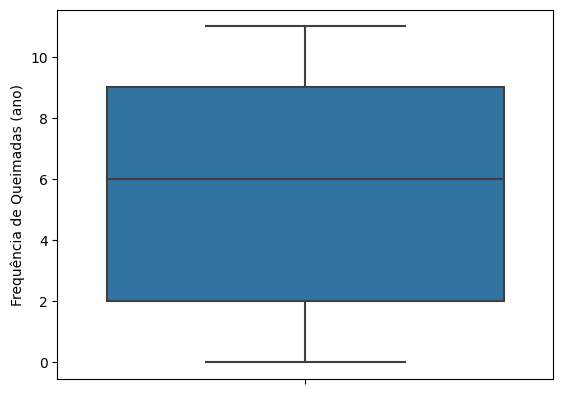

In [14]:
sns.boxplot(y=df[numeric_int_features.columns[0]])

## Data Distribution

In [15]:
df_objetct_features.iloc[:, 3:].columns

Index(['Presença de Escola (Sim/Não)', 'Presença de Unidade de Saúde (Sim/Não)'], dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


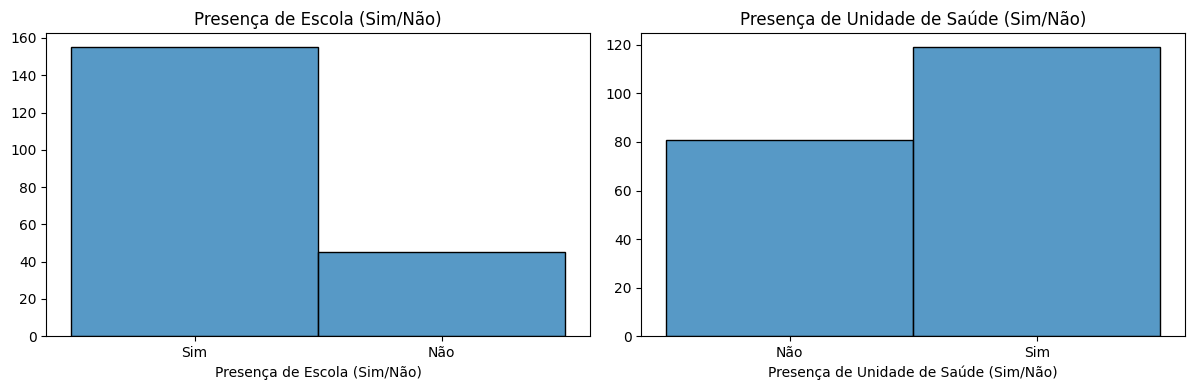

In [16]:
num_colunas = len(df_objetct_features.iloc[:, 3:].columns)

num_cols_grid = 3
num_rows_grid = math.ceil(num_colunas / num_cols_grid)

fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 6, num_rows_grid * 4))
axes = axes.flatten()

for i, col in enumerate(df_objetct_features.iloc[:, 3:].columns):
    sns.histplot(x=df[col], ax=axes[i], )
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

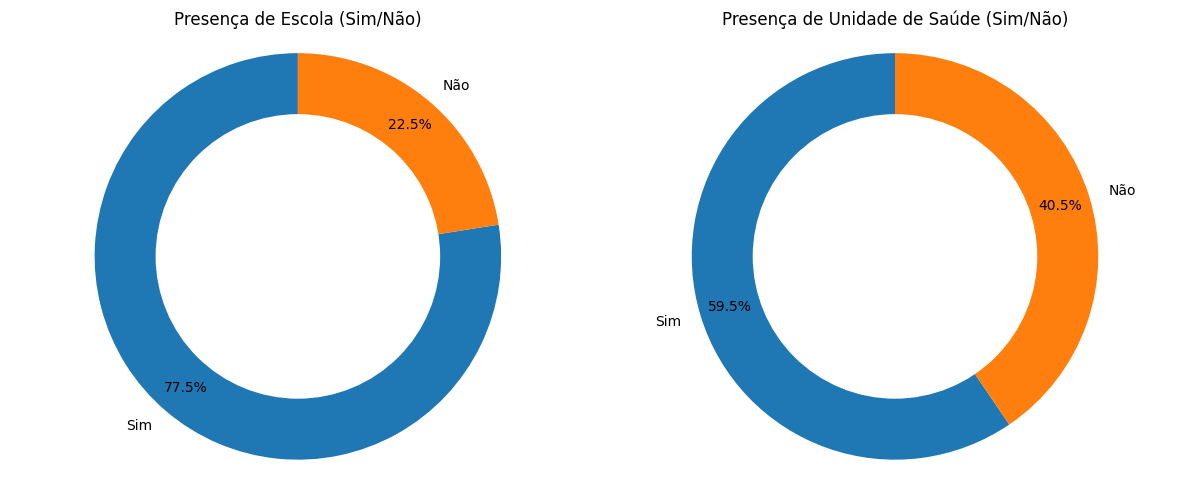

In [17]:
num_colunas = len(df_objetct_features.iloc[:, 3:].columns)

num_cols_grid = 3
num_rows_grid = math.ceil(num_colunas / num_cols_grid)

fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 6, num_rows_grid * 5))
axes = axes.flatten()

for i, col in enumerate(df_objetct_features.iloc[:, 3:].columns):
    counts = df[col].value_counts()
    labels = counts.index
    sizes = counts.values

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)
    
    axes[i].axis('equal')  
    
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

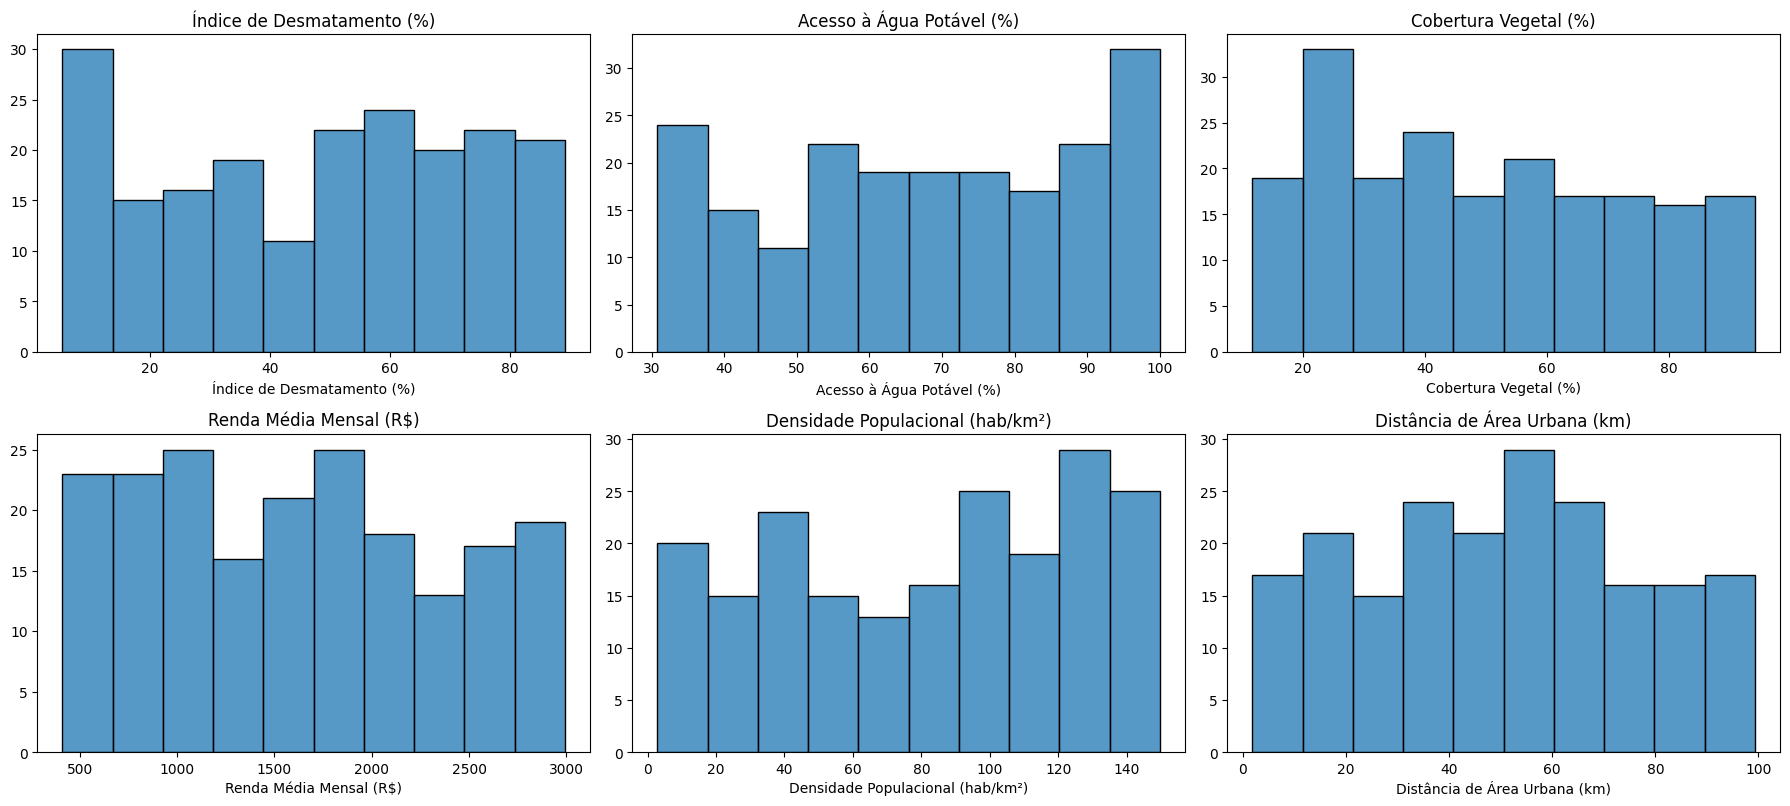

In [18]:
num_colunas = len(numeric_floats_features)

num_cols_grid = 3 
num_rows_grid = math.ceil(num_colunas / num_cols_grid)

fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(num_cols_grid * 6, num_rows_grid * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_floats_features):
    sns.histplot(x=df[col], ax=axes[i], bins=10)
    axes[i].set_title(col)
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Frequência de Queimadas (ano)', ylabel='Count'>

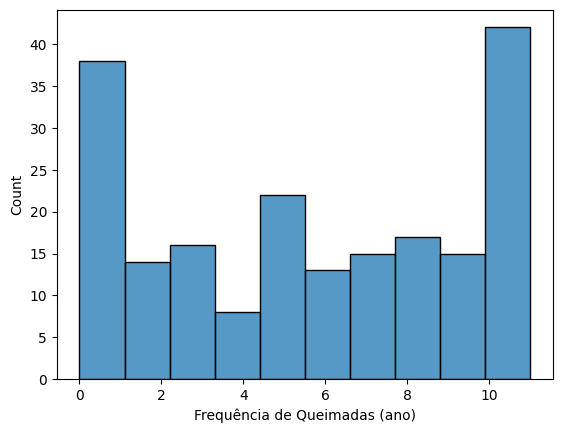

In [19]:
sns.histplot(x=df[numeric_int_features.columns[0]], bins=10)

## Mapa de Correlação

In [20]:
mapping = {'Sim': 1, 'Não': 0}

In [21]:
col_mapping = ["Presença de Escola (Sim/Não)", "Presença de Unidade de Saúde (Sim/Não)"]
for col in col_mapping:
    df[col] = df[col].map(mapping)

In [22]:
df_features = df.iloc[:, 3:]

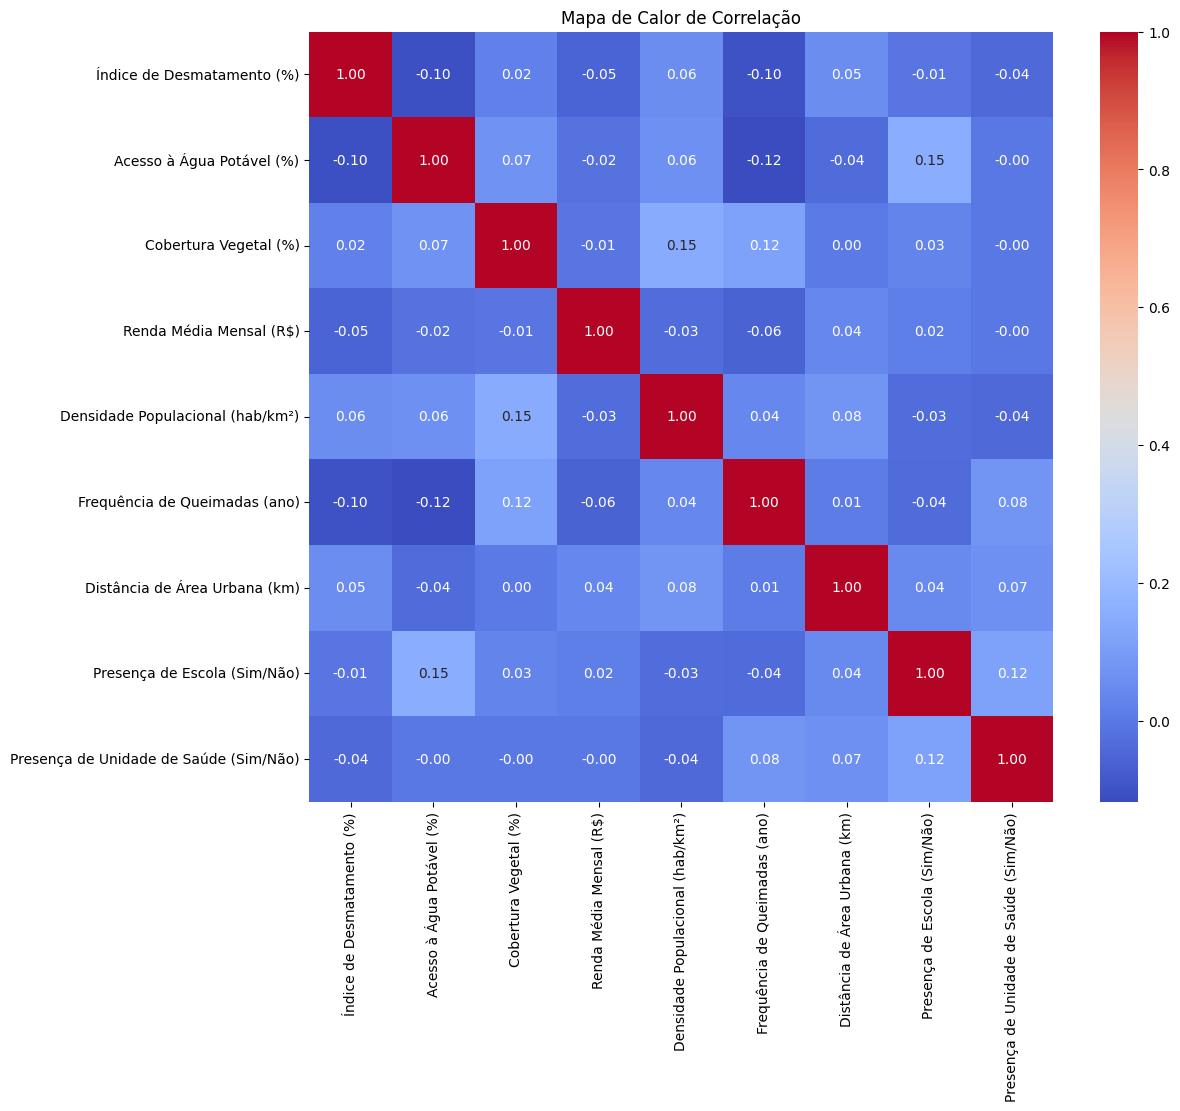

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

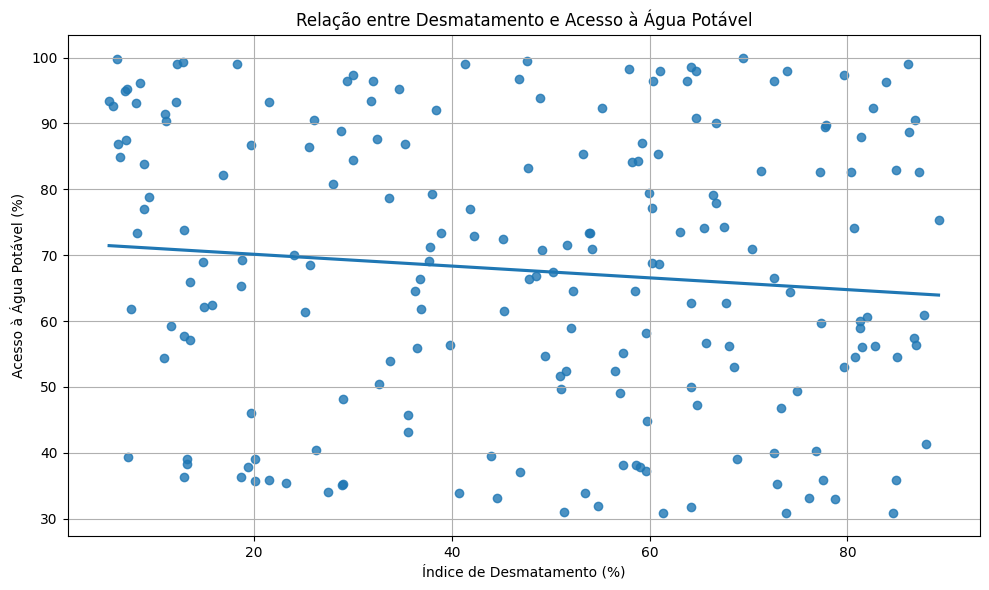

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Índice de Desmatamento (%)', y='Acesso à Água Potável (%)', data=df, ci=None)

plt.title('Relação entre Desmatamento e Acesso à Água Potável')
plt.xlabel('Índice de Desmatamento (%)')
plt.ylabel('Acesso à Água Potável (%)')
plt.grid(True)
plt.tight_layout()
plt.show()